In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# 파일 불러오기
ab = pd.read_csv('C:/Users/user/Desktop/해커톤/KODEX200_220624_20220726.csv', encoding='cp949')
ab.head()

,일자,종가,대비,등락률,순자산가치(NAV),시가,고가,저가,거래량,거래대금,시가총액,순자산총액,상장좌수,기초지수_지수명,기초지수_종가,기초지수_대비,기초지수_등락률
0,2022-06-24,31285,645,2.11,31268.47,30800,31410,30700,10451953,3.260000e+11,4.940000e+12,5.070000e+12,157900000,코스피 200,312.07,6.62,2.17
1,2022-06-27,31685,400,1.28,31681.63,31520,31930,31235,8572714,2.720000e+11,5.140000e+12,5.260000e+12,162150000,코스피 200,316.20,4.13,1.32
2,2022-06-28,31930,245,0.77,31972.52,31725,31930,31560,6746503,2.150000e+11,5.300000e+12,5.390000e+12,165950000,코스피 200,319.11,2.91,0.92
3,2022-06-29,31395,535,-1.68,31457.14,31555,31655,31365,6177527,1.940000e+11,5.300000e+12,5.330000e+12,168700000,코스피 200,312.86,6.25,-1.96
4,2022-06-30,30875,520,-1.66,30890.10,31280,31280,30870,7940411,2.460000e+11,5.230000e+12,5.250000e+12,169300000,코스피 200,307.20,5.66,-1.81


Text(0, 0.5, '종가')

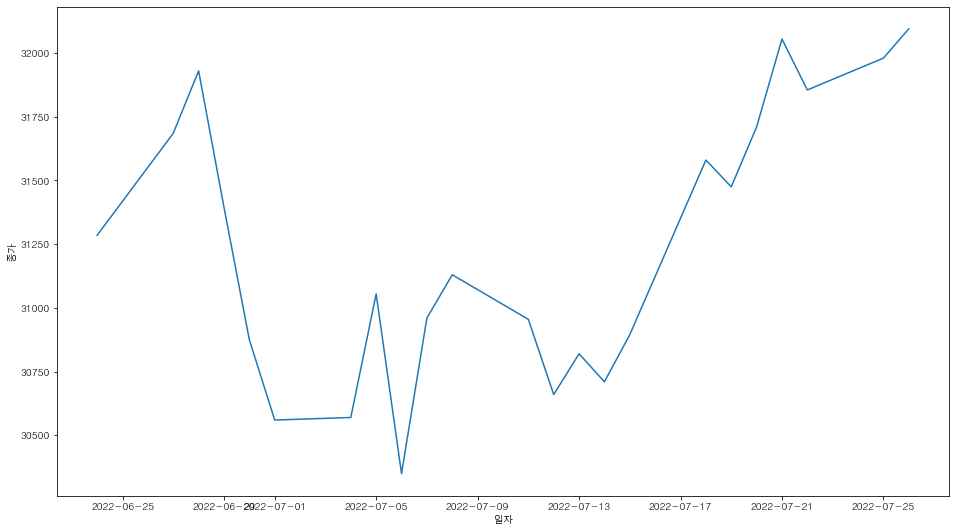

In [104]:
# 시각화를 위해 일자를 날짜형으로 변환
ab['일자'] = pd.to_datetime(ab['일자'], format='%Y-%m-%d')
ab['월별'] = ab['일자'].dt.month


# 종가 시각화
plt.figure(figsize=(16, 9))
sns.lineplot(y=ab['종가'], x=ab['일자'])
plt.xlabel('일자')
plt.ylabel('종가')

In [105]:
#'일자'를 datetime 객체로 설정 
frame = ab.set_index('일자')

In [106]:
# 최종 데이터프레임의 이름은 'df' 
df = frame.drop(columns=['시가','고가','저가','대비','등락률','순자산가치(NAV)','거래대금','시가총액','순자산총액','상장좌수','기초지수_지수명','기초지수_종가','기초지수_대비','기초지수_등락률','월별'], axis=1)
df

,종가,거래량
일자,,
2022-06-24,31285,10451953
2022-06-27,31685,8572714
2022-06-28,31930,6746503
2022-06-29,31395,6177527
2022-06-30,30875,7940411
2022-07-01,30560,6240988
2022-07-04,30570,8932236
2022-07-05,31055,7245145
2022-07-06,30350,9116536


### 데이터 전처리

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의
scale_cols = ['종가','거래량']
# 스케일 후 columns
scaled = scaler.fit_transform(df[scale_cols])
scaled

array([[0.53581662, 1.        ],
       [0.76504298, 0.76999571],
       [0.90544413, 0.54648164],
       [0.59885387, 0.47684339],
       [0.3008596 , 0.69260672],
       [0.12034384, 0.48461052],
       [0.1260745 , 0.81399842],
       [0.40401146, 0.60751156],
       [0.        , 0.83655531],
       [0.3495702 , 0.5464858 ],
       [0.4469914 , 0.80232428],
       [0.34670487, 0.5249477 ],
       [0.17765043, 0.4002393 ],
       [0.26934097, 0.55798835],
       [0.20630372, 0.4424634 ],
       [0.31232092, 0.60872312],
       [0.70487106, 0.60119465],
       [0.64469914, 0.2942825 ],
       [0.77936963, 0.55428353],
       [0.97707736, 0.40014702],
       [0.86246418, 0.48486779],
       [0.93409742, 0.3266211 ],
       [1.        , 0.        ]])

df = pd.DataFrame(scaled, columns=scale_cols)

In [110]:
len(df)

23

### 학습용 데이터 생성

In [113]:
lookback = 3

x = []
y = []

for i in range(len(df)-lookback):
    x.accend(df[i:i*lookback])
    y.accendd(df[i*lookback,[i]])

AttributeError: 'list' object has no attribute 'accend'

### 시계열 데이터의 데이터셋 분리

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('종가',1), df['종가'], test_size=0.2, random_state=0, shuffle=False)
x_train.shape, y_train.shape

C:\Users\user\AppData\Local\Temp\ipykernel_33216\1908967008.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train,x_test,y_train,y_test = train_test_split(df.drop('종가',1), df['종가'], test_size=0.2, random_state=0, shuffle=False)


((18, 1), (18,))

### Tensorflow Dataset을 활용한 시퀀스 데이터셋 구성

In [77]:
import tensorflow as tf

In [78]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [79]:
WINDOW_SIZE=20
BATCH_SIZE=20

In [80]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [81]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

### 모델

In [99]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_data.shape[1], test_data.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

AttributeError: 'PrefetchDataset' object has no attribute 'shape'

In [93]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [94]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)


In [97]:
model.fit(train_data,test_data, batch_size=32, epochs=10)

ValueError: `y` argument is not supported when using dataset as input.

In [95]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=1000, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/1000


ValueError: Unexpected result of `train_function` (Empty logs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [ ]:
model.load_weights(filename)